## About the data

**age**: age of primary beneficiary<br>
**sex**: insurance contractor gender, female, male<br>
**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
**children**: Number of children covered by health insurance / Number of dependents<br>
**smoker**: Smoking<br>
**region**: the beneficiary's residential area in the US<br>
**charges**: Individual medical costs billed by health insurance<br>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.shape

(1338, 7)

In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Text(0, 0.5, 'Count')

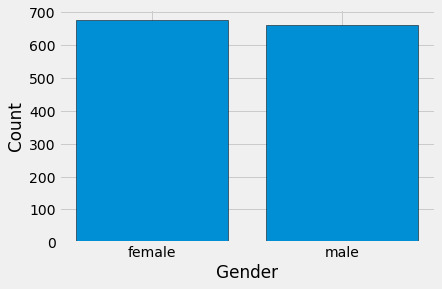

In [8]:
plt.style.use('fivethirtyeight')
count = df['sex'].value_counts()
gender = df['sex'].unique()
plt.bar(gender,count, edgecolor='black')
plt.xlabel("Gender")
plt.ylabel("Count")

In [9]:
#df['sex'] = df['sex'].replace(to_replace={'female':0,'male':1})
df['smoker'] = df['smoker'].replace(to_replace={'no':0,'yes':1})

In [10]:
df.groupby('sex').charges.mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [11]:
print('Not much difference in insurance cost between the two sexes')

Not much difference in insurance cost between the two sexes


In [12]:
df.groupby('region').charges.mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [13]:
list(df.groupby('region').charges.mean().values)

[13406.3845163858, 12417.575373969228, 14735.411437609895, 12346.93737729231]

In [14]:
list(df.groupby('region').charges.mean().index)

['northeast', 'northwest', 'southeast', 'southwest']

Text(0, 0.5, 'charges')

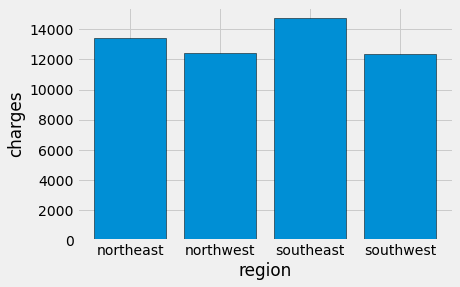

In [15]:
charges = df.groupby('region').charges.mean().values
gender = df.groupby('region').charges.mean().index
plt.bar(gender,charges, edgecolor='black')
plt.xlabel("region")
plt.ylabel("charges")

In [16]:
print("The charges are pretty much the same for every region.")

The charges are pretty much the same for every region.


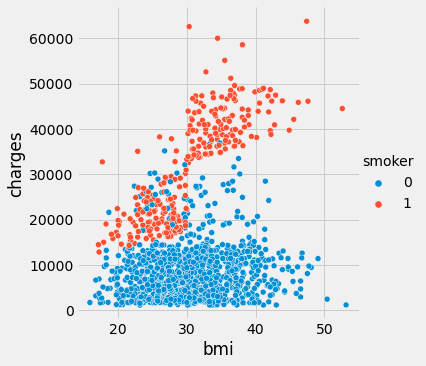

In [17]:
sns.relplot(x='bmi',y='charges',data=df, hue='smoker')

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


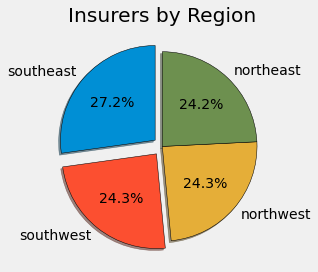

In [19]:
slices = df['region'].value_counts()
labels = df['region'].value_counts().index
explode = [0.1, 0.1, 0,0]
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Insurers by Region")
plt.tight_layout()
plt.show()

In [20]:
print('Median age -->', math.floor(df['age'].median()))

Median age --> 39


Text(0.5, 1.0, 'Insurance by AgeGroup')

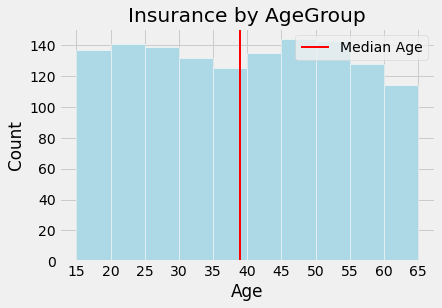

In [21]:
plt.hist(df['age'], bins = range(15, 70, 5), edgecolor = 'white', color = 'lightblue')
plt.xticks(range(15, 70, 5))
med_age = 39
plt.axvline(med_age, color='red', label='Median Age', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Insurance by AgeGroup')

In [22]:
#pd.get_dummies(df['region'],drop_first=True).head()

In [23]:
#df1=pd.get_dummies(df['region'],drop_first=True)
#df = pd.concat([df1,df],axis=1)

In [24]:
df.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


### Remove outliers

In [25]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('smoker'):
        m = np.mean(subdf.charges)
        st = np.std(subdf.charges)
        reduced_df = subdf[(subdf.charges>(m-st)) & (subdf.charges<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [26]:
df=remove_pps_outliers(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [28]:
features = ['age','bmi','smoker']
X=df[features]
y=df['charges'] 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [32]:
X_test.tail()

,age,bmi,smoker
842,32,17.765,1
415,42,26.125,0
475,45,39.805,0
577,45,35.300,0
483,62,29.920,0


In [33]:
y_test

277    12643.37780
437    12231.61360
751     4058.11610
171    12265.50690
173    12646.20700
          ...     
842    32734.18630
415     7729.64575
475     7448.40395
577     7348.14200
483    13457.96080
Name: charges, Length: 196, dtype: float64

In [34]:
regressor.predict([[28,34.5,1]])

array([31986.36236213])

In [35]:
y_pred=regressor.predict(X_test)

In [36]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_pred)
mse

10923414.349469477

In [37]:
regressor.score(X_test,y_test)

0.88943193604058

In [38]:
regressor.score(X_train,y_train)

0.8786667592855147

In [39]:
regressor.coef_

array([  162.27980134,   186.97912604, 25654.7427281 ])

In [40]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,162.279801
bmi,186.979126
smoker,25654.742728


**Interpreting the coefficients:**<br>

Holding all other features fixed, a 1 unit increase in bmi is associated with an increase of $187 in price.

In [41]:
from numpy import cov
covariance = cov(df['age'],df['charges'])
print(covariance)

[[1.56040758e+02 1.48983084e+04]
 [1.48983084e+04 1.02955118e+08]]


We see that there is a +ve correlation between the two variables. However, upon training the model, we may find that as the value of one variable increases, the value of the other decreases. This can happen in a multivariate regression model.<br>

**Implementing Regularization Technique**

In [42]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=0.15) 
RidgeModel.fit(X_train, y_train)
RidgeModel.score(X_test, y_test)

0.8894234429147017

In [43]:
prediction=RidgeModel.predict(X_test)

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2290.598057331534
MSE: 10924253.415740239


<IPython.core.display.Javascript object>

RMSE: 3305.1858367934833


**Using Polynomial Regression**

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly_reg = PolynomialFeatures(degree=2)

In [47]:
X_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [48]:
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly, y_train)
lin_reg2.score(X_test_poly,y_test)

0.9508236063818799

In [49]:
lin_reg2.predict(poly_reg.transform([[28,34.5,0]]))

array([4505.91709632])

In [50]:
RidgeModel_2 = Ridge(alpha=0.2) 
RidgeModel_2.fit(X_poly, y_train)
RidgeModel_2.score(X_test_poly,y_test)

0.9509586599942735

In [51]:
RidgeModel_2.predict(poly_reg.transform([[18,38.5,1]]))

array([40598.33384063])

In [52]:
prediction=RidgeModel_2.predict(X_test_poly)

**Regression Evaluation Metrics**<br>
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, and we want to minimize them.

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1190.1471052703218
MSE: 4844969.31530223


<IPython.core.display.Javascript object>

RMSE: 2201.1291000989086


In [54]:
prediction=lin_reg2.predict(X_test_poly)

In [55]:
def pred(age,bmi,smoker):
    new_data = [[age,bmi,smoker]]
    return (lin_reg2.predict(poly_reg.transform(new_data)))

In [56]:
pred(28,34.5,0)

array([4505.91709632])

In [57]:
max(df['bmi'])

49.06

In [58]:
print("This model was created without scaling. Had the features been scaled, the algorithm might have performed better.")

This model was created without scaling. Had the features been scaled, the algorithm might have performed better.
